In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [2]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

[('MW', 1.975, 0.075, 0.01 , 2.06 , 0.041)
 ('M31', 1.921, 0.12 , 0.019, 2.06 , 0.067)
 ('M33', 0.187, 0.009, 0.   , 0.196, 0.046)]


# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `sersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [3]:
def sersicE(r,re,n,mtot):
    '''
    Computes the sersic profile for an Elliptical galaxy, assuming M/L ~ 1
    
    PARAMETERS
    ----------
    r: 'float'
        Distance from the center of the galaxy (kpc)
    re: 'float'
        The effective radius (2D half-light radius) in kpc
    n: 'int'
        The sersic index
    mtot: 'float'
        The total stellar mass (Msun)
        
    RETURNS
    -------
    I: 'array of floats'
        The surface brightness profile
    '''
    lum = mtot # Assumed true
    Ie = lum/7.2/np.pi/re**2 # Effective surface brightness
    
    # The surface brightness - Sersic profile
    a = (r/re)**(1/n)
    b = -7.67*(a-1)
    I = Ie*np.exp(b)
    return I

# Part B

a) Create an instance of the MassProfile Class for M31. Store it as a variable `M31`. 


In [27]:
M31 = MassProfile("M31",0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [28]:
r = np.arange(0.1,30,0.1)

c) Define a new array called `bulge_mass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `bulge_mass` by adding `.value` 


In [29]:
bulge_mass = M31.MassEnclosed(3,r*u.kpc).value

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `bulge_I`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [30]:
bulge_I = bulge_mass/4/np.pi/r**2

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [31]:
# total madd of the bulge
bulge_total = ComponentMass("M31_000.txt",3)*1e12
print(f"{bulge_total:.2e}")

1.90e+10


In [32]:
# half the total bulge mass
b_half = bulge_total/2
print(b_half)

9500000000.0


In [33]:
# Where is the bulge mass greater than half the total mass?
indices = np.where(bulge_mass > b_half)
print(bulge_mass)

[4.11078300e+07 3.08810040e+08 7.83054030e+08 1.39165044e+09
 2.00826789e+09 2.65295898e+09 3.19939233e+09 3.75885987e+09
 4.28423799e+09 4.74444516e+09 5.21367600e+09 5.66887002e+09
 6.09398514e+09 6.48400821e+09 6.88405758e+09 7.22695704e+09
 7.55381442e+09 7.88367969e+09 8.15037927e+09 8.45417616e+09
 8.73491256e+09 8.99158584e+09 9.24625386e+09 9.50192451e+09
 9.72250311e+09 9.93205278e+09 1.01546366e+10 1.03581705e+10
 1.05155834e+10 1.06890384e+10 1.08464513e+10 1.09928353e+10
 1.11392193e+10 1.12926217e+10 1.14229636e+10 1.15492950e+10
 1.16716158e+10 1.17979472e+10 1.19192654e+10 1.20175232e+10
 1.21117704e+10 1.22140387e+10 1.23022701e+10 1.23945121e+10
 1.24837461e+10 1.25719776e+10 1.26612116e+10 1.27644825e+10
 1.28366719e+10 1.29058534e+10 1.29940848e+10 1.30742952e+10
 1.31725529e+10 1.32347160e+10 1.32928685e+10 1.33530263e+10
 1.34212052e+10 1.34773525e+10 1.35465339e+10 1.36127075e+10
 1.36748706e+10 1.37330231e+10 1.38001993e+10 1.38623624e+10
 1.39144991e+10 1.395961

In [35]:
re_bulge = r[indices][0]
print(re_bulge)

2.4000000000000004


# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

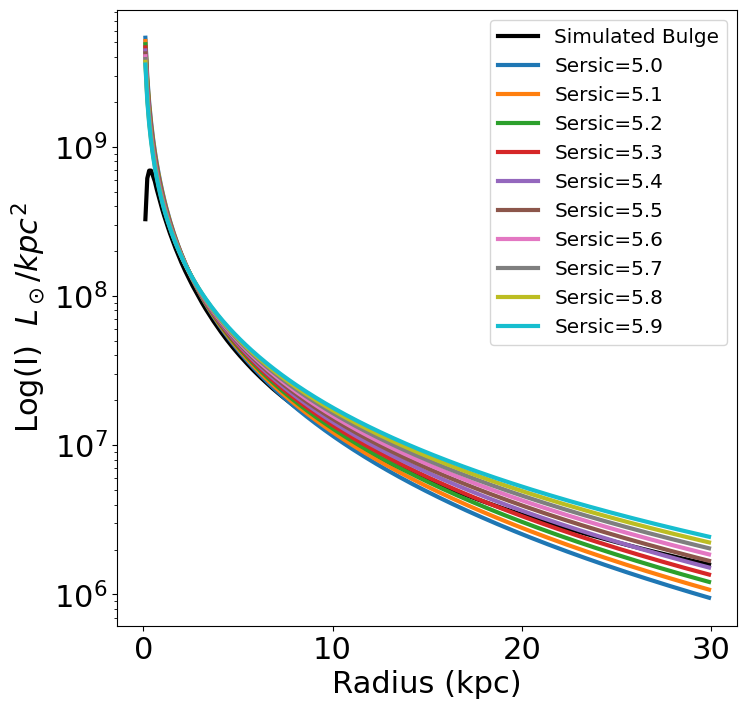

In [43]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)


# plot the bulge mass density as a proxy for surface brighntess
plt.semilogy(r,bulge_I,color='k',linewidth=3,label='Simulated Bulge')

# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic
for i in np.arange(5,6,0.1):
    plt.semilogy(r,sersicE(r,re_bulge,i,bulge_total),linewidth=3,label='Sersic='+str(np.round(i,5)))


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')


plt.savefig('Lab6.png')